In [218]:
from sklearn.datasets import make_blobs
import random
import numpy as np
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt
import ripser
import math
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import csv
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from persim import plot_diagrams, PersImage, PersistenceImager
from sklearn.decomposition import PCA
from sklearn import preprocessing

def generate_random_clusters(n_samples, n_features, n_clusters):
    """
    Generates pointclouds with a specified number of points, features and clusters.
    """
    X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters)
    return X

n_samples = 200
n_clusters = 6
datas = []
classification = []

#Generate data
for i in range(2,n_clusters+1):
    for j in range(math.floor(n_samples)):
        datas.append(np.array(generate_random_clusters(random.randint(100,500),4,i)))
        classification.append(i)

#Generate h0 and h1 diagrams for our data
rips = ripser.Rips(maxdim=1, coeff=2)
diagrams_h0 = [rips.fit_transform(data)[0] for data in datas]

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


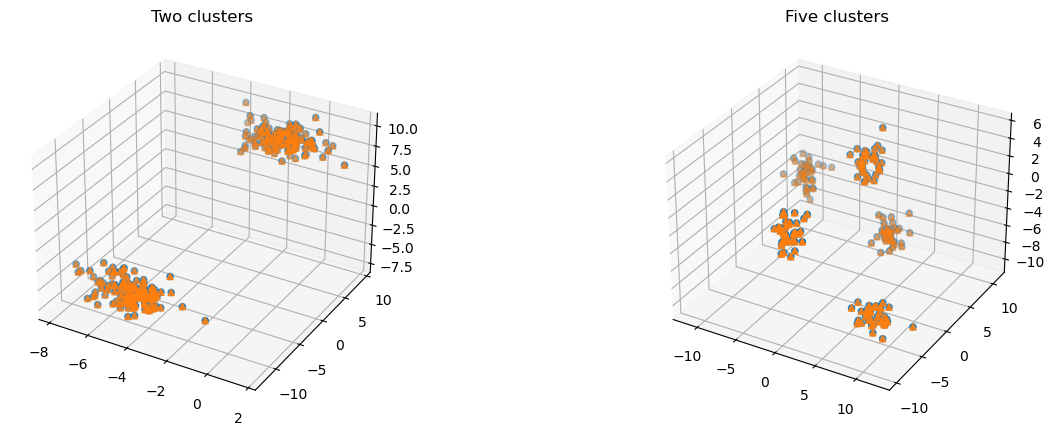

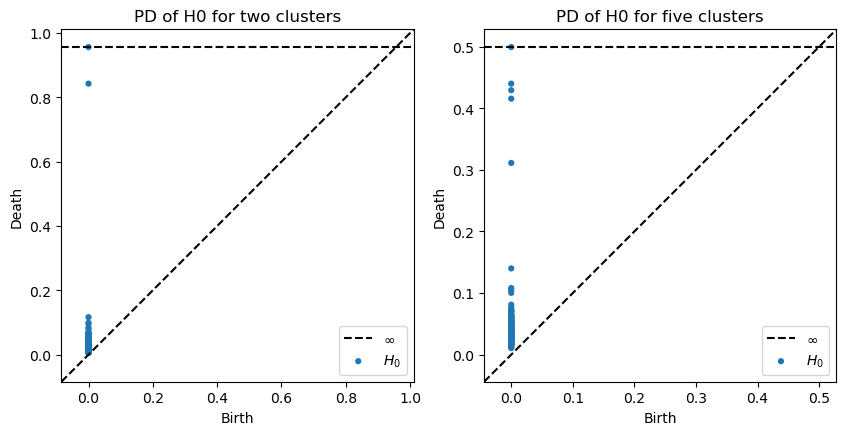

In [273]:

# Create a figure with two 3D subplots
fig = plt.figure(figsize=(15, 5))  # Adjust figsize as needed

# First 3D subplot
ax1 = fig.add_subplot(121, projection='3d')
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = datas[2][:, 0]
    ys = datas[2][:, 1]
    zs = datas[2][:, 2]
    ax1.scatter(xs, ys, zs, marker=m)

ax1.set_title('Two clusters')  # Replace with a suitable title

# Second 3D subplot
ax2 = fig.add_subplot(122, projection='3d')
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = datas[617][:, 0]
    ys = datas[617][:, 1]
    zs = datas[617][:, 2]
    ax2.scatter(xs, ys, zs, marker=m)

ax2.set_title('Five clusters')  # Replace with a suitable title

plt.show()


# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Adjust figsize as needed

# Plot the first diagram on the left subplot
plot_diagrams(diagrams_h0[2], ax=axes[0], show=False)
axes[0].set_title('PD of H0 for two clusters')  # Replace with a suitable title

# Plot the second diagram on the right subplot
plot_diagrams(diagrams_h0[617], ax=axes[1], show=False)
axes[1].set_title('PD of H0 for five clusters')  # Replace with a suitable title

# Show the plot
plt.show()


In [219]:
#Create csv files for migrating to matlab for vectorization

with open('h0data.csv','w',newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    for i in range(len(diagrams_h0)):
        for row in diagrams_h0[i][:-1]:
            csvwriter.writerow(row)
        csvwriter.writerow("?")

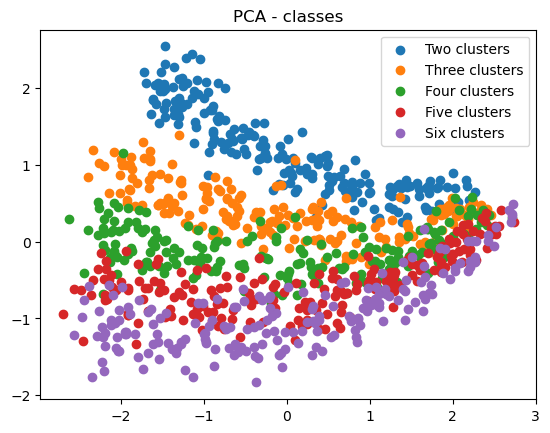

In [255]:
PVs = np.genfromtxt("PVs.csv",delimiter=",") #Read vectors

normalized_vectors = preprocessing.normalize(PVs)

pca = PCA(n_components=3)
principal_components = pca.fit_transform(PVs)


plt.scatter(principal_components[0:200, 0], principal_components[0:200, 1],label='Two clusters')
plt.scatter(principal_components[201:400, 0], principal_components[201:400, 1],label='Three clusters')
plt.scatter(principal_components[401:600, 0], principal_components[401:600, 1],label='Four clusters')
plt.scatter(principal_components[601:800, 0], principal_components[601:800, 1],label='Five clusters')
plt.scatter(principal_components[801:1000, 0], principal_components[801:1000, 1],label='Six clusters')
plt.title('PCA - classes')
plt.legend(loc="upper right")
plt.show()



In [249]:

classification = np.array(classification) #does not work if not np.

#Classifier initialization
svm_classifier = SVC(kernel='linear', random_state=42)

# Crossvalidation for overfitting
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_classifier, principal_components, classification, cv=cv, scoring='accuracy')

# Cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Reports for each fold.
for i, (train_idx, test_idx) in enumerate(cv.split(principal_components, classification)):
    X_train, X_test = principal_components[train_idx], principal_components[test_idx]
    y_train, y_test = classification[train_idx], classification[test_idx]

    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)

    print(f"\nClassification Report - Fold {i+1}")
    print(classification_report(y_test, y_pred))

Cross-Validation Scores: [0.73  0.65  0.725 0.68  0.715]
Mean Accuracy: 0.7

Classification Report - Fold 1
              precision    recall  f1-score   support

           2       0.95      0.93      0.94        40
           3       0.73      0.88      0.80        40
           4       0.66      0.62      0.64        40
           5       0.56      0.50      0.53        40
           6       0.74      0.72      0.73        40

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200


Classification Report - Fold 2
              precision    recall  f1-score   support

           2       0.93      0.95      0.94        40
           3       0.57      0.75      0.65        40
           4       0.50      0.40      0.44        40
           5       0.51      0.47      0.49        40
           6       0.73      0.68      0.70        40

    accuracy                           0.65  

In [221]:
#Importing iris dataset

iris = load_iris()
X = iris.data

# Creating a Filtration
iris_h0 = rips.fit_transform(X)[0]


with open('iris0data.csv','w',newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    for row in iris_h0[:-1]:
        csvwriter.writerow(row)


[2]


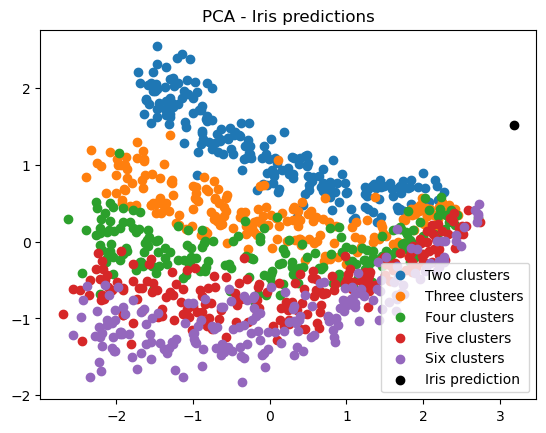

In [271]:
#Read data
irisVs = np.genfromtxt("iris/iris.csv",delimiter=",")
#Normalize
irisNormalized = preprocessing.normalize([irisVs])
#Reduce features with PCA
irisVector = pca.transform(irisNormalized)
#Classify
print(svm_classifier.predict(irisVector))
#Show where Iris data lies in relation to training data
plt.scatter(principal_components[0:200, 0], principal_components[0:200, 1],label='Two clusters')
plt.scatter(principal_components[201:400, 0], principal_components[201:400, 1],label='Three clusters')
plt.scatter(principal_components[401:600, 0], principal_components[401:600, 1],label='Four clusters')
plt.scatter(principal_components[601:800, 0], principal_components[601:800, 1],label='Five clusters')
plt.scatter(principal_components[801:1000, 0], principal_components[801:1000, 1],label='Six clusters')
plt.scatter(irisVector[0][0],irisVector[0][1],color="black",label = "Iris prediction")
plt.title('PCA - Iris predictions')
plt.legend(loc="lower right")
plt.show()

#As it turns out the Iris dataset is too different from the training set, so classification is incorrect.

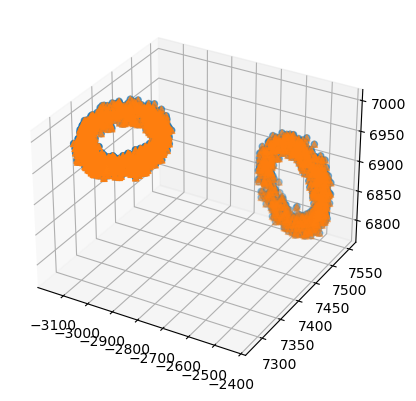

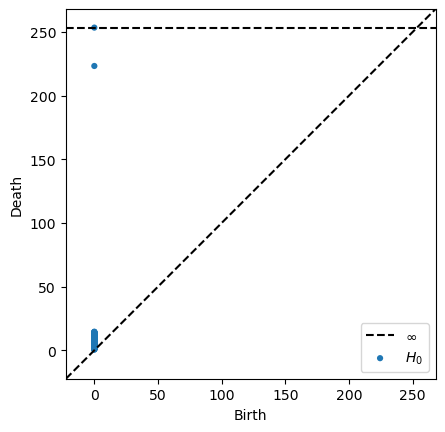

In [274]:
twoCircles = np.genfromtxt("dataout/data_13.out",delimiter=" ")

circles_h0 = rips.fit_transform(twoCircles)[0]

#Plot the clusters (for 3D)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = twoCircles[:,0]
    ys = twoCircles[:,1]
    zs = twoCircles[:,2]
    ax.scatter(xs, ys, zs, marker=m)
plt.show()

plot_diagrams(circles_h0)

with open('circle0data.csv','w',newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    for row in circles_h0[:-1]:
        csvwriter.writerow(row)

[2]


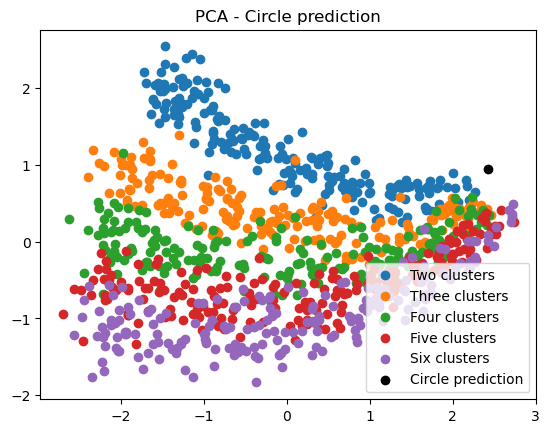

In [272]:
#Read data
circleVs = np.genfromtxt("dataout/data13.csv",delimiter=",")
#Normalize
irisNormalized = preprocessing.normalize([circleVs])
#Reduce features with PCA
circleVector = pca.transform(irisNormalized)
#Classify
print(svm_classifier.predict(circleVector))
#Show where Iris data lies in relation to training data
plt.scatter(principal_components[0:200, 0], principal_components[0:200, 1],label='Two clusters')
plt.scatter(principal_components[201:400, 0], principal_components[201:400, 1],label='Three clusters')
plt.scatter(principal_components[401:600, 0], principal_components[401:600, 1],label='Four clusters')
plt.scatter(principal_components[601:800, 0], principal_components[601:800, 1],label='Five clusters')
plt.scatter(principal_components[801:1000, 0], principal_components[801:1000, 1],label='Six clusters')
plt.scatter(circleVector[0][0],circleVector[0][1],color="black",label = "Circle prediction")
plt.title('PCA - Circle prediction')
plt.legend(loc="lower right")
plt.show()

#As it turns out the Iris dataset is too different from the training set, so classification is incorrect.